<h1 align='center'>Melhores práticas de aprendizado para avaliação de modelos e ajuste de hiperparâmetros</h1>
<p align='center'><img src=https://blog.lyceum.com.br/wp-content/uploads/2018/11/218328-qual-o-papel-do-professor-nas-metodologias-ativas-saiba-aqui.jpg></p>


<p align='justify'>Aprenderemos sobre as melhores práticas adotadas na construção de bons modelos de aprendizado de máquina, ajustando os algoritmos e avaliando o desempenho dos modelos. Nós aprenderemos algumas técnicas de como fazer:</p>

<li>Avaliação do desempenho dos modelos de aprendizado de máquina</li>

<li>Diagnóstico dos problemas comuns dos algoritmos de aprendizado de máquina</li>

<li>Ajuste de modelos de aprendizado de máquina</li>

<li>Avaliação de modelos preditivos usando diferentes métricas de desempenho</li>

<h3>Simplificando fluxos de trabalho com pipelines</h3>
<p align='justify'>Aprendemos que nós precisamos reutilizar os parâmetros que foram obtidos durante o ajuste dos dados de treinamento para dimensionar e compactar quaisquer novos dados, como os exemplos no conjunto de dados de teste separado. Agora, falaremos sobre uma ferramenta extremamente útil, a classe <i>Pipeline</i> no <i>scikit-learn</i>. Ela nos permite ajustar um modelo incluindo um número arbitrário de etapas de transformação e aplicá-lo para fazer previsões sobre novos dados.</p>

In [1]:
# Carregando o conjunto de dados Breast Cancer Wisconsin
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# Características do DataFrame
df.shape

(569, 32)

<p align='justify'>Em seguida, atribuiremos os 30 recursos a um array NumPy, X. Usando um objeto LabelEncoder, transformaremos os rótulos de classe de sua representação de string original ('M' e 'B') em inteiros.</p>

In [3]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

<p align='justify'>Depois de codificar os rótulos de classe (diagnóstico) em uma matriz, <i>y</i>, os tumores malignos são agora representados como classe 1 e os tumores benignos são representados como classe 0, respectivamente. Podemos verificar novamente esse mapeamento chamando o método <i>transform</i> do <i>LabelEncoder</i> ajustado em dois rótulos de classe fictícios.</p>

In [4]:
# Explicando como funcionado o LabelEncoder
le.transform(['M', 'B'])

array([1, 0])

In [5]:
# Dividindo o Dataset em 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
    test_size=0.20,
    stratify=y,
    random_state=1)

<h4>Combinando transformadores e estimadores em um pipeline</h4>

<p align='justify'>Aprendemos que muitos algoritmos de aprendizado exigem recursos de entrada na mesma escala para um desempenho ideal. Como os recursos no conjunto de dados <i>Breast Cancer Wisconsin</i> são medidos em várias escalas diferentes, padronizaremos as colunas no conjunto de dados <i>Breast Cancer Wisconsin</i> antes de alimentá-las para um classificador linear, como por exemplo, regressão logística.</p>

<p align='justify'>Além disso, vamos supor que queremos compactar nossos dados das 30 dimensões iniciais em um subespaço bidimensional inferior por meio da Análise de Componentes Principais (<i>PCA</i>), uma técnica de extração de recursos para redução de dimensionalidade.</p>

<p align='justify'>Em vez de passar pelas etapas de ajuste de modelo e transformação de dados para os conjuntos de dados de treinamento e teste separadamente, podemos encadear os objetos <i>StandardScaler</i>, <i>PCA</i> e <i>LogisticRegression</i> em um <i>pipeline</i>.</p>

In [6]:
# Carregando as bibliotecas
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Realizando as Transformações
pipe_lr = make_pipeline(StandardScaler(),                                    # Padronizando os dados.
                        PCA(n_components=2),                                 # Reduzindo a Dimensionalidade 
                        LogisticRegression(random_state=1,solver='lbfgs'))   # Selecionado um Algoritmo de Classificação

# Ajustando o modelo
pipe_lr.fit(X_train, y_train)

# Realizando as predições
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


<p align='justify'>Os <i>pipelines</i> da biblioteca <i>scikit-learn</i> são ferramentas de <i>wrapper</i> imensamente úteis. Observe atentamente a ilustração a seguir, e veja como o <i>Pipeline</i> funciona.</p>
<p align='center'><img src=https://hoctructuyen123.net/wp-content/uploads/2019/07/pipeline-diagram.png></p>

<h4>Usando validação cruzada k-fold para avaliar o desempenho do modelo</h4>


<p align='justify'>Uma das principais etapas na construção de um modelo de aprendizado de máquina é estimar seu desempenho em dados que o modelo não viu antes. Vamos supor que ajustamos nosso modelo em um conjunto de dados de treinamento e usamos os mesmos dados para estimar o desempenho dele em novos dados. Lembramos que um modelo pode sofrer de <i>underfitting</i> (alta tendência) se o modelo for muito simples ou pode superajustar (<i>overfitting</i>) os dados de treinamento ( alta variância) se o modelo for muito complexo para os dados de treinamento subjacentes.</p>

<p align='justify'>Para encontrar uma compensação aceitável de variância de viés, precisamos avaliar nosso modelo com cuidado. Veremos algumas técnicas comuns de validação cruzada, validação cruzada de retenção (<i><b>holdout cross-validation</i></b>) e validação cruzada <i>k-fold</i> (<i><b>k-fold cross-validation</i></b>), que podem nos ajudar a obter estimativas confiáveis ​​acerca do desempenho da generalização do modelo, ou seja, quão bem o modelo funciona em dados desconhecidos (não vistos).</p>

<h4>O método de retenção (<i>holdout method</i>)</h4>

<p align='justify'>Uma abordagem clássica e popular para estimar o desempenho de generalização de modelos de aprendizado de máquina é a validação cruzada de validação. Usando o método <i>holdout</i>, dividimos nosso conjunto de dados inicial em conjuntos de dados de <u>treinamento e teste</u> separados - o primeiro é usado para treinamento de modelo e o último é usado para estimar seu desempenho de generalização.</p>

<p align='justify'>No entanto, em aplicativos típicos de aprendizado de máquina, também estamos interessados ​​em ajustar e comparar diferentes configurações de parâmetros para melhorar ainda mais o desempenho para fazer previsões em dados não vistos. Esse processo é chamado de seleção de modelo, com o nome referente a um determinado problema de classificação para o qual desejamos selecionar os valores ótimos dos parâmetros de ajuste (também chamados de <b>hiperparâmetros</b>). No entanto, se reutilizarmos o mesmo conjunto de dados de teste repetidamente durante a seleção do modelo, ele se tornará parte de nossos dados de treinamento e, portanto, o modelo terá maior probabilidade de se ajustar.</p>

<p align='justify'>Apesar desse problema, muitas pessoas ainda usam o conjunto de dados de teste para seleção de modelos, o que não é uma boa prática de aprendizado de máquina. Uma maneira melhor de usar o método de validação para seleção de modelo é separar os dados em três partes: <u>um conjunto de dados de treinamento, um conjunto de dados de validação e um conjunto de dados de teste</u>. <b>O conjunto de dados de treinamento</b> é usado para ajustar os diferentes modelos e o desempenho no <b>conjunto de dados de validação</b> é então usá-lo para a seleção do modelo.</p>

<p align='justify'>A vantagem de ter um conjunto de dados de teste que o modelo não viu antes durante as etapas de treinamento e seleção do modelo é que podemos obter uma estimativa <b>menos tendenciosa</b> de sua capacidade de generalizar para novos dados. A figura a seguir ilustra o conceito de validação cruzada de validação,onde usamos um conjunto de dados de validação para avaliar repetidamente o desempenho do modelo após o treinamento usando diferentes valores de hiperparâmetro. Quando estivermos satisfeitos com o ajuste dos valores dos hiperparâmetros, estimamos o desempenho de generalização do modelo no conjunto de dados de teste.</p>

<p align='center'><img src=https://nthu-datalab.github.io/ml/labs/08_CV_Ensembling/fig-holdout.png></p>

<p align='justify'>Uma desvantagem do método <i>holdout</i> é que a estimativa de desempenho pode ser muito sensível à forma como particionamos o conjunto de dados de treinamento nos subconjuntos de treinamento e validação; a estimativa variará para diferentes exemplos dos dados. Veremos uma técnica mais robusta para estimativa de desempenho, <b>validação cruzada k-fold</b>, onde repetimos o método <i>holdout</i> <i>k</i> vezes em <i>k</i> subconjuntos dos dados de treinamento.</p>

<h4>Validação cruzada K-fold (<i>K-fold cross-validation</i>)</h4>

<p align='justify'>Na validação cruzada de <i>k-folds</i>, dividimos aleatoriamente o conjunto de dados de treinamento em <i>k folds</i> sem substituição, onde <i>k-1 folds</i> são usados para o treinamento do modelo e um <i>fold</i> é usado para avaliação de desempenho. Este procedimento é repetido <i>k</i> vezes para obtermos <i>k</i> modelos e estimativas de desempenho.</p>


<p align='justify'>Em seguida, calculamos o desempenho médio dos modelos com base nos diferentes <i>folds</i> de teste independentes para obter uma estimativa de desempenho que seja menos sensível ao subparticionamento dos dados de treinamento em comparação com o método <i>holdout</i>. Normalmente, usamos validação cruzada <i>k-fold</i> para ajuste do modelo, ou seja, encontrar os valores ótimos de hiperparâmetros que produzem um desempenho de generalização satisfatório, que é estimado a partir da avaliação do desempenho do modelo nas <i>folds</i> de teste.</p>

<p align='justify'>Depois de encontrarmos valores de hiperparâmetros satisfatórios, podemos treinar novamente o modelo no conjunto de dados de treinamento completo e obter uma estimativa de desempenho final usando o conjunto de dados de teste independente. A lógica por trás do ajuste de um modelo para todo o conjunto de dados de treinamento após a validação cruzada <i>k-fold</i> é que ao fornecer mais exemplos de treinamento para um algoritmo de aprendizado geralmente a tendência é resultar em um modelo mais <u>preciso e robusto</u>.</p>

<p align='justify'>Como a validação cruzada <i>k-fold</i> é uma técnica de reamostragem sem substituição, a vantagem dessa abordagem é que cada exemplo será usado para treinamento e validação (como parte de uma <i>fold</i> de teste) exatamente uma vez, o que produz uma estimativa de variância mais baixa do desempenho do modelo do que o método <i>holdout</i>. A figura a seguir resume o conceito por trás da validação cruzada <i>k-fold</i> com <i>k</i> = 10. O conjunto de dados de treinamento é dividido em 10 <i>folds</i> e, durante as 10 iterações, nove <i>folds</i> são usadas para treinamento e uma <i>fold</i> será usada como conjunto de dados de teste para a avaliação do modelo.</p>

<p align='center'><img src=https://www.researchgate.net/publication/326465007/figure/fig1/AS:649909518757888@1531961912055/Ten-fold-cross-validation-diagram-The-dataset-was-divided-into-ten-parts-and-nine-of.png></p>


<p align='justify'>Um bom valor padrão para <i>k</i> na validação cruzada de <i>k</i> vezes é 10, como mostra a evidência empírica. Por exemplo, experimentos de <i>Ron Kohavi</i> em vários conjuntos de dados do mundo real sugerem que a validação cruzada de 10 vezes oferece a melhor compensação entre viés e variância.</p>

<p align='justify'>No entanto, se estivermos trabalhando com conjuntos de treinamento relativamente pequenos, pode ser útil aumentar o número de <i>folds</i>. Se aumentarmos o valor de <i>k</i>, mais dados de treinamento serão usados ​​em cada iteração, o que resulta em um <b>viés pessimista menor</b> para estimar o desempenho da generalização pela média das estimativas do modelo individual. No entanto, grandes valores de <i>k</i> também aumentarão o tempo de execução do algoritmo de validação cruzada e produzirão estimativas <u>com maior variância</u>, uma vez que as <i>folds</i> de treinamento serão mais semelhantes entre si. Por outro lado, se estivermos trabalhando com grandes conjuntos de dados, podemos escolher um valor menor para <i>k</i>, por exemplo, <i>k</i> = 5, e ainda obter uma estimativa precisa do desempenho médio do modelo, reduzindo o <u>custo computacional de reajuste</u> e avaliando o modelo nas diferentes <i>folds</i>.</p>

<blockquote>
<h5>Validação cruzada <i>leave-one-out</i></h5>
<p align='justify'>Um caso especial de validação cruzada <i>k-fold</i> é o método de validação cruzada <i>leave-one-out (LOOCV)</i>. No <i>LOOCV</i>, definimos o número de <i>folds</i> igual ao número de exemplos de treinamento (k = n) para que apenas um exemplo de treinamento seja usado para teste durante cada iteração, o que é uma abordagem recomendada para trabalhar com conjuntos de dados muito pequenos.</p>
</blockquote>

<p align='justify'>Uma ligeira melhoria em relação à abordagem padrão de validação cruzada <i>k-fold</i> é a validação cruzada <i>k-fold</i> estratificada, que pode gerar melhores estimativas de viés e variância, especialmente em casos de proporções de classe desiguais, o que também foi demonstrado no mesmo estudo por <i>Ron Kohavi</i>. Na validação cruzada estratificada, as proporções dos rótulos de classe são preservadas em cada <i>fold</i> para garantir que cada <i>fold</i> seja representativa das proporções de classe no conjunto de dados de treinamento, que ilustraremos usando o iterador <i>StratifiedKFold</i> no <i>scikit-learn</i>.</p>


In [7]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
    np.bincount(y_train[train]), score))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [256 153], Acc: 0.935
Fold:  2, Class dist.: [256 153], Acc: 0.935
Fold:  3, Class dist.: [256 153], Acc: 0.957
Fold:  4, Class dist.: [256 153], Acc: 0.957
Fold:  5, Class dist.: [256 153], Acc: 0.935
Fold:  6, Class dist.: [257 153], Acc: 0.956
Fold:  7, Class dist.: [257 153], Acc: 0.978
Fold:  8, Class dist.: [257 153], Acc: 0.933
Fold:  9, Class dist.: [257 153], Acc: 0.956
Fold: 10, Class dist.: [257 153], Acc: 0.956

CV accuracy: 0.950 +/- 0.014


<p align='justify'>Embora o exemplo de código anterior tenha sido útil para ilustrar como funciona a validação cruzada <i>k-fold</i>, o <i>scikit-learn</i> também implementa um marcador de validação cruzada <i>k-fold</i>, que nos permite avaliar nosso modelo usando validação cruzada <i>k-fold</i> estratificada menos detalhadamente.</p>

In [8]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print()
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]

CV accuracy: 0.950 +/- 0.014


<p align='justify'>Um recurso extremamente útil da abordagem <i>cross_val_score</i> é que podemos distribuir a avaliação das diferentes dobras em várias unidades de processamento central (CPUs) em nossa máquina. Se definirmos o parâmetro <i>n_jobs</i> para 1, apenas uma CPU será usada para avaliar o desempenho, assim como em nosso exemplo <i>StratifiedKFold</i> anteriormente. No entanto, definindo <i>n_jobs=2</i>, poderíamos distribuir as 10 rodadas de validação cruzada para duas CPUs (se disponíveis em nossa máquina) e, definindo <i>n_jobs=-1</i>, podemos usar todas as CPUs disponíveis em nossa máquina para fazer o cálculo em paralelo.</p>

<h3>Algoritmos de depuração com curvas de aprendizado e validação</h3>

<p align='justify'>Veremos duas ferramentas de diagnóstico muito simples, mas poderosas, que podem nos ajudar a melhorar o desempenho de um algoritmo de aprendizado: <b>curvas de aprendizado</b> e <b>curvas de validação</b>. Discutiremos como podemos usar curvas de aprendizado para diagnosticar se um algoritmo de aprendizado tem um problema com <i>overfitting</i> (alta variância) ou <i>underfitting</i> (alto viés). Além disso, veremos como as curvas de validação podem nos ajudar a resolver os problemas comuns de um algoritmo de aprendizado.</p>

<h5>Diagnosticando problemas de viés e variância com curvas de aprendizado</h5>

<p align='justify'>Se um modelo for muito complexo para um determinado conjunto de dados de treinamento - há muitos graus de liberdade ou parâmetros nesse modelo - o modelo tende a se ajustar demais aos dados de treinamento e não generaliza bem para dados não vistos. Muitas vezes, coletar mais exemplos de treinamento pode reduzir o grau de <i>overfitting</i>.</p>

<p align='justify'>No entanto, na prática, muitas vezes pode ser muito caro ou simplesmente inviável coletar mais dados. Ao plotar as precisões de treinamento e validação do modelo como funções do tamanho do conjunto de dados de treinamento, podemos detectar facilmente se o modelo sofre de alta variância (<i>overfitting</i>) ou alto viés (<i>underfitting</i>) e se a coleta de mais dados pode ajudar a resolver esse problema. Mas antes de discutirmos como plotar curvas de aprendizado no <i>scikit-learn</i>, vamos discutir esses dois problemas comuns de modelo percorrendo a ilustração a seguir:</p>

<p align='center'><img src=https://sebastianraschka.com/images/faq/ml-solvable/bias-variance.png></p>


<p align='justify'>O gráfico no canto superior esquerdo mostra um modelo com alto viés (<i>underfitting</i>). Esse modelo tem baixa precisão de treinamento e validação cruzada, o que indica que ele não se ajusta aos dados de treinamento. Formas comuns de resolver esse problema são aumentar o número de parâmetros do modelo, por exemplo, coletando ou construindo recursos adicionais, ou diminuindo o grau de regularização, por exemplo, em máquina de vetores de suporte (SVM) ou classificadores de regressão logística.</p>

<p align='justify'>O gráfico no canto superior direito mostra um modelo que sofre de alta variância (<i>overfitting</i>), o que é indicado pela grande lacuna entre a precisão do treinamento e da validação cruzada. Para resolver esse problema de <i>overfitting</i>, podemos coletar mais dados de treinamento, reduzir a complexidade do modelo ou aumentar o parâmetro de regularização, por exemplo.</p>

<p align='justify'>Para modelos não regularizados, também podemos ajudar a diminuir o número de recursos por meio da seleção de recursos  ou extração de recursos para diminuir o grau de sobreajuste. Embora a coleta de mais dados de treinamento, geralmente, tenda a diminuir a chance de <i>overfitting</i>, isso nem sempre pode ajudar, por exemplo, se os dados de treinamento forem extremamente <u>ruidosos</u> ou o modelo já estiver muito próximo do ideal.</p>

<p align='justify'>Veremos como resolver esses problemas de modelo usando curvas de validação, mas vamos primeiro ver como podemos usar a função de curva de aprendizado do <i>scikit-learn</i> para avaliar o modelo:

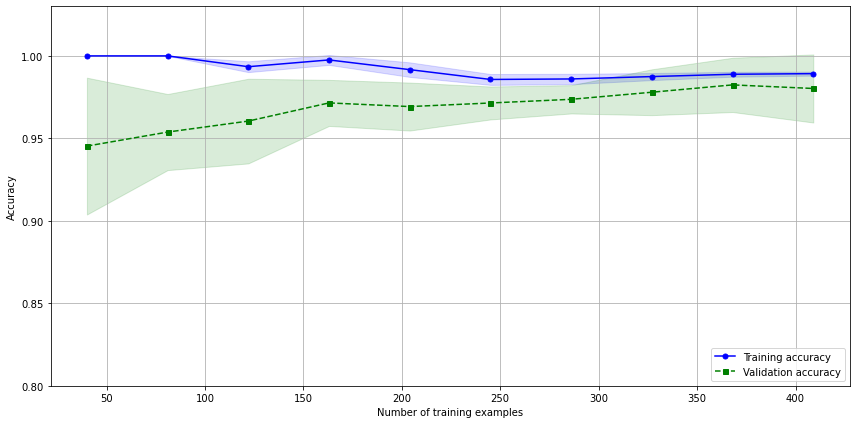

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',                 # Implementa um penalidade 
                                            random_state=1,
                                            solver='lbfgs',              # Implementa o solver 'lbfgs' ['l2', 'none']
                                            max_iter=10000))             # Número máximo de iterações tomadas para os solvers convergirem.

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,                        # Objeto que implementa fit e predict
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),    # Nr Exemplo que serão gerados [entre 0 e 1]. No caso, serão 10
                               cv=10,                                    # Determina a estratégia de divisão em 10
                               n_jobs=1)                                 # Número de jobs a serem executados em paralelo.  

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(12,6))
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')


plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

<p align='justify'>Através do parâmetro <i>train_sizes</i> na função <i>learning_curve</i>, podemos controlar o número absoluto ou relativo de exemplos de treinamento que são usados para gerar as curvas de aprendizado. Aqui, definimos <b>train_sizes=np.linspace(0.1, 1.0, 10)</b> para usar <b>10 intervalos</b> relativos uniformemente espaçados para os tamanhos do conjunto de dados de treinamento. Por padrão, a função <i>learning_curve</i> usa validação cruzada <i>k-fold</i> estratificada para calcular a precisão da validação cruzada de um classificador, e definimos <u>k=10</u> por meio do parâmetro cv para validação cruzada estratificada de <u>10 vezes</u>.</p>

<p align='justify'>Como podemos ver no gráfico da curva de aprendizado anterior, nosso modelo funciona muito bem nos conjuntos de dados de treinamento e validação se tiver visto mais de 250 exemplos durante o treinamento. Também podemos ver que a precisão do treinamento aumenta para conjuntos de dados de treinamento com menos de 250 exemplos, e a lacuna entre a validação e a precisão do treinamento aumenta - um indicador de um grau crescente de <i>overfitting</i>.

<h4>Abordando o <i>over</i> e <i>underfitting</i> com curvas de validação</h4>

<p align='justify'>As curvas de validação são uma ferramenta útil para melhorar o desempenho de um modelo, abordando questões como <i>overfitting</i> ou <i>underfitting</i>. As curvas de validação estão relacionadas às curvas de aprendizado, mas em vez de plotar as acurácias de treinamento e teste em função do tamanho da amostra, variamos os valores dos parâmetros do modelo, por exemplo, o parâmetro de regularização inversa, <i>C</i>, na regressão logística. Vamos ver como criamos curvas de validação via <i>scikit-learn</i>:

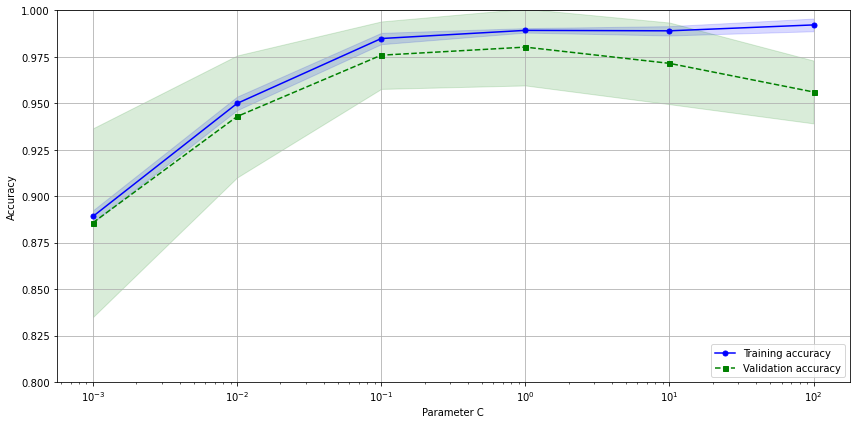

In [10]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(12,6))
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

<p align='justify'>Semelhante à função <i>learning_curve</i>, a função <i>validation_curve</i> usa validação cruzada <i>k-fold</i> estratificada por padrão para estimar o desempenho do classificador. Dentro da função <i>validation_curve</i>, especificamos o parâmetro que queremos avaliar. Nesse caso, é <i>C</i>, o parâmetro de regularização inversa do classificador <i>LogisticRegression</i>, que escrevemos como <i>'logisticregression__C'</i> para acessar o objeto <i>LogisticRegression</i> dentro do <i>pipeline scikit-learn</i> para um intervalo de valores especificado que definimos por meio do parâmetro <i>param_range</i>. Semelhante ao exemplo da curva de aprendizado, plotamos as precisões médias de treinamento e validação cruzada e os desvios padrão correspondentes.


<p align='justify'>Embora as diferenças na precisão para valores variados de <i>C</i> sejam sutis, podemos ver que o modelo se ajusta ligeiramente aos dados quando aumentamos a força de regularização (pequenos valores de <i>C</i>). No entanto, para grandes valores de <i>C</i>, isso significa diminuir a força da regularização, de modo que o modelo tende a sobreajustar ligeiramente os dados. Nesse caso, o ponto ideal parece estar entre <b>0,01</b> e <b>0,1</b> do valor <i>C</i>.</p>

<h3>Ajustando modelos de aprendizado de máquina por meio do <i>Grid Search</i></h3>

<p align='justify'>No aprendizado de máquina, temos dois tipos de parâmetros: aqueles que são aprendidos a partir dos dados de treinamento, por exemplo, os pesos na regressão logística, e os parâmetros de um algoritmo de aprendizado que são otimizados separadamente. Estes últimos são os parâmetros de ajuste (ou <b>hiperparâmetros</b>) de um modelo, por exemplo, o parâmetro de regularização em regressão logística ou o parâmetro de profundidade de uma árvore de decisão.</p>

<p align='justify'>Anteriomente, usamos curvas de validação para melhorar o desempenho de um modelo ajustando um de seus hiperparâmetros. Agorao, veremos uma técnica popular de otimização de hiperparâmetros chamada <i>Grid Search</i>, que pode ajudar ainda mais a melhorar o desempenho de um modelo ao encontrar a combinação ideal de valores de hiperparâmetros.</p>

<h4>Ajustando hiperparâmetros por meio do <i>Grid Search</i></h4>

<p align='justify'>A abordagem da <i>Grid Search</i> é bastante simples: é um paradigma de pesquisa exaustiva de <b>força bruta</b>, onde especificamos uma lista de valores para diferentes hiperparâmetros e o computador avalia o desempenho do modelo para cada combinação para obter a combinação ideal de valores desse conjunto:</p>

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Construindo o Pipeline
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))


param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

# Definindo os Parâmentro do Grid Search [lista de Dicionários]
param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,            # Utilizando o modelo
                  param_grid=param_grid,         # Indicando os Parâmentros da Lista de Dicionário
                  scoring='accuracy',            # Estratégia para avaliar o desempenho do modelo de validação cruzada no conjunto de testes
                  refit=True,                    # Reajusta um estimador usando os melhores parâmetros encontrados em todo o conjunto de dados.
                  cv=10,                         # Determina a estratégia de divisão da Validação Cruzada.
                  n_jobs=-1)                     # Número de jobs a serem executados em paralelo. (-1 significa que usará todos disponíveis)

# Treinando o modelo
gs = gs.fit(X_train, y_train)

print(f"O melhor score: {gs.best_score_:.2%}")
print(f"\nOs melhores parâmetros calculados foram: \n {gs.best_params_}")

O melhor score: 98.69%

Os melhores parâmetros calculados foram: 
 {'svc__C': 10.0, 'svc__kernel': 'rbf'}


<p align='justify'>Por fim, usamos o conjunto de dados de teste independente para estimar o desempenho do modelo melhor selecionado, que está disponível por meio do atributo <i>best_estimator_</i> do objeto GridSearchCV:</p>

In [12]:
clf = gs.best_estimator_

# clf.fit(X_train, y_train)
# Observe que não é necessário reajustar o classificador, porque está feito automaticamente via refit=True 

print(f'Teste de Acurácia: {clf.score(X_test, y_test):.2%}'  )

Teste de Acurácia: 95.61%


<blockquote>
<h5>Pesquisa aleatória de hiperparâmetros</h5>

<p align='justify'>Embora o <i>Grid Search</i> seja uma abordagem poderosa para encontrar o conjunto ótimo de parâmetros, a avaliação de todas as combinações de parâmetros possíveis também é <b>computacionalmente muito cara</b>. Uma abordagem alternativa para amostragem de diferentes combinações de parâmetros usando o <i>scikit-learn</i> é a <u>pesquisa aleatória</u> (<i>RandomizedSearch</i>).</p>

<p align='justify'>A <i>RandomizedSearch</i> geralmente performa tão bem quanto a <i>Grid Search</i>, porém possui mais custo-benefício. Em particular, se apenas amostrarmos 60 combinações de parâmetros por meio da <i>RandomizedSearch</i>, já teremos uma probabilidade de 95% de obter soluções dentro de 5% do desempenho ideal. Usando a classe <i>RandomizedSearchCV</i> no <i>scikit-learn</i>, podemos desenhar combinações de parâmetros aleatórios de distribuições de amostragem com uma coleção especificada.</p>

<h4>Seleção de algoritmo com validação cruzada aninhada</h4>

<p align='justify'>Usar validação cruzada <i>k-fold</i> em conjunto com o <i>Grid Search</i> é uma abordagem útil para ajustar o desempenho de um modelo de aprendizado de máquina variando seus valores de hiperparâmetros, como vimos anteriomente. Se quisermos selecionar, dentre diferentes algoritmos de aprendizado de máquina, validação cruzada aninhada é outra abordagem recomendada. Um estudo sobre o viés na estimativa de erro, <i>Sudhir Varma</i> e <i>Richard Simon</i> concluíram que o verdadeiro erro da estimativa é <u>quase imparcial</u> em relação ao conjunto de dados de teste quando a validação cruzada aninhada é utilizada.</p>

<p align='justify'>Na validação cruzada aninhada, temos um <i>loop</i> externo de validação cruzada <i>k-fold</i> para dividir os dados em dobras de treinamento e teste e um <i>loop</i> interno que é usado para selecionar o modelo usando validação cruzada <i>k-fold</i> na dobra de treinamento. Após a seleção do modelo, a dobra de teste é usada para avaliar o desempenho do modelo. A figura a seguir explica o conceito de validação cruzada aninhada com apenas cinco dobras externas e duas internas, o que pode ser útil para grandes conjuntos de dados onde o <u>desempenho computacional</u> é importante; esse tipo específico de validação cruzada aninhada também é conhecido como <b>validação cruzada 5x2</b>:</p>

<p align='center'><img src=https://vitalflux.com/wp-content/uploads/2020/08/Screenshot-2020-08-30-at-6.33.47-PM.png></p>

In [13]:
# No scikit-learn, podemos realizar a validação cruzada aninhada da seguinte forma:

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

CV accuracy: 0.976 +/- 0.021


<p align='justify'>A precisão da validação cruzada média retornada nos dá uma boa estimativa do que esperar se ajustarmos os hiperparâmetros de um modelo e usá-lo em dados não vistos. Por exemplo, podemos usar a abordagem de validação cruzada aninhada para comparar um modelo <i>SVM</i> com um classificador de árvore de decisão simples; para simplificar, apenas ajustaremos seu parâmetro de profundidade:</p>

In [14]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), 
                                      np.std(scores)))

CV accuracy: 0.934 +/- 0.016


<p align='justify'>Como podemos ver, o desempenho de validação cruzada aninhada do modelo SVM (97,4%) é notavelmente melhor do que o desempenho da árvore de decisão (93,4%) e, portanto, esperamos que seja a melhor escolha para classificar novos dados provenientes da mesma população desse conjunto de dados específico.</p>

<h3>Olhando para diferentes métricas de avaliação de desempenho</h3>

<p align='justify'>Avaliamos diferentes modelos de aprendizado de máquina usando a precisão da previsão, que é uma métrica útil para quantificar o desempenho de um modelo em geral. No entanto, existem várias outras métricas de desempenho que podem ser usadas para medir a relevância de um modelo, como <i>precision</i>, <i>recall</i> e a <i>F1 score</i>.</p>

<h4>Lendo uma Matriz de Confusão</h4>

<p align='justify'>Uma matriz de confusão é simplesmente uma matriz quadrada que relata as contagens das previsões de verdadeiro positivo (TP), verdadeiro negativo (TN), falso positivo (FP) e falso negativo (FN) de um classificador, conforme mostrado na figura a seguir:</p>

<p align='center'><img src=https://miro.medium.com/max/1400/1*fxiTNIgOyvAombPJx5KGeA.png width='500'></p>

In [15]:
# Matriz de Confusão no Scikit-Learn

from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


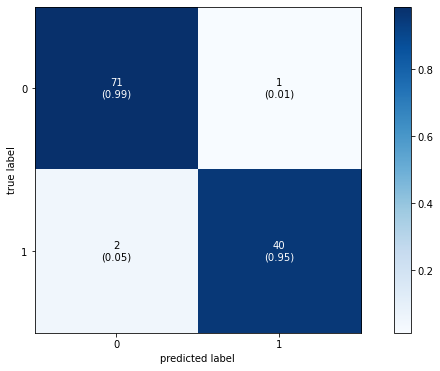

In [16]:
# Usando a biblioteca MLXTEND
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(12,6))
plt.show()

<p align=-'justify'>Assumindo que a classe 1 (maligno) é a classe positiva neste exemplo, nosso modelo classificou corretamente 71 dos exemplos que pertencem à classe 0 (TN) e 40 exemplos que pertencem à classe 1 (TP), respectivamente. No entanto, nosso modelo também classificou incorretamente dois exemplos da classe 1 como classe 0 (FN), e previu que um exemplo é maligno, embora seja um tumor benigno (FP).</p> 

<h4>Otimizando a precisão e a recuperação de um modelo de classificação</h4>

<p align='justify'>Tanto o erro de previsão (ERR) quanto a precisão (ACC) fornecem informações gerais sobre quantos exemplos são classificados incorretamente. O erro pode ser entendido como a soma de todas as previsões falsas dividida pelo número total de previsões, e a precisão (<i>accuracy</i>) é calculada como a soma das previsões corretas dividida pelo número total de previsões, respectivamente.</p>

<p align='justify'>A taxa de verdadeiros positivos (TPR) e a taxa de falsos positivos (FPR) são métricas de desempenho especialmente úteis para problemas de classe desequilibrada:</p>

<p align='center'><img src= http://algolytics.com/wp-content/uploads/2018/05/roc1_en.png></p>

<p align='justify'>A precisão das métricas de desempenho (PRE) e o recall (REC) estão relacionados a essas taxas de TP e TN e, de fato, REC é sinônimo de TPR. Revisitar o exemplo de detecção de tumor maligno, otimizando para recall ajuda a minimizar a chance de não detectar um tumor maligno. No entanto, isso tem o custo de prever tumores malignos em pacientes, embora os pacientes sejam saudáveis (um alto número de FP). Se otimizarmos para precisão, por outro lado, enfatizamos a correção se predizermos que um paciente tem um tumor maligno. No entanto, isso ocorre à custa de tumores malignos ausentes com mais frequência (um alto número de FN).</p>

<p align='justify'>Para equilibrar os lados positivos e negativos da otimização de PRE e REC, geralmente é usada uma combinação de PRE e REC, a chamada <i>F1 Score</i>:

<p align='center'><img src=https://sebastianraschka.com/images/faq/multiclass-metric/pre-rec.png></p>

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.976
Recall: 0.952
F1: 0.964


<p align='justify'>Além disso, podemos usar uma métrica de pontuação diferente da precisão no <i>GridSearchCV</i> por meio do parâmetro de pontuação. Uma lista completa dos diferentes valores aceitos pelo parâmetro de pontuação pode ser encontrada na página do <a href=http://scikit-learn.org/stable/modules/model_evaluation.html><i>scikit-learn</i></a>.</p>
<p align='justify'>Lembre-se de que a classe positiva no <i>scikit-learn</i> é a classe rotulada como classe 1. Se quisermos especificar um rótulo positivo diferente, podemos construir nosso próprio marcador por meio da função <i>make_scorer</i>, que podemos fornecer diretamente como um argumento para o parâmetro de pontuação em <i>GridSearchCV</i> (neste exemplo, usando o <i>f1_score</i> como uma métrica):</p>

In [18]:
from sklearn.metrics import make_scorer

scorer = make_scorer(f1_score, pos_label=0)

c_gamma_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f"Melhor Pontuação: {gs.best_score_:.2%}")
print(f"\nMelhores parâmentros: {gs.best_params_}")

Melhor Pontuação: 98.62%

Melhores parâmentros: {'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


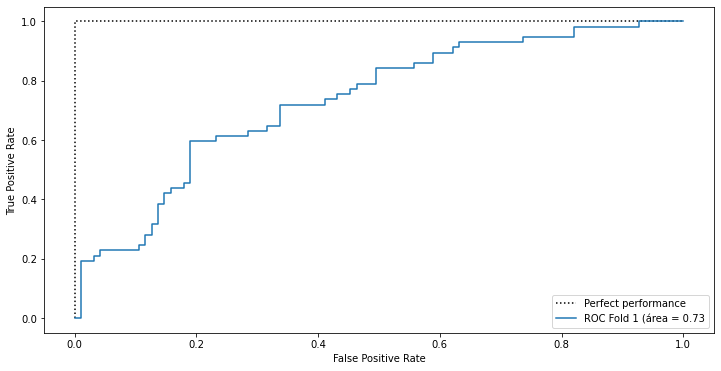

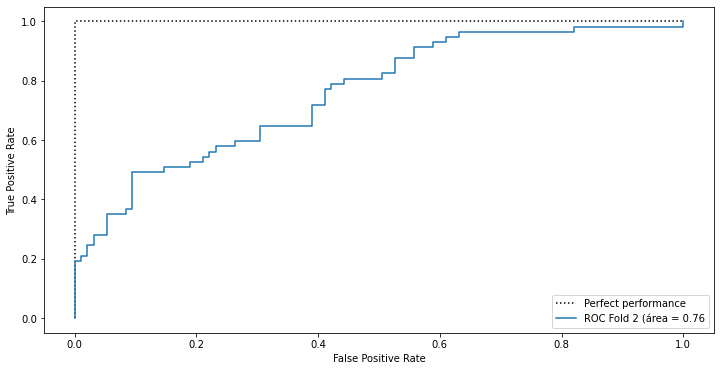

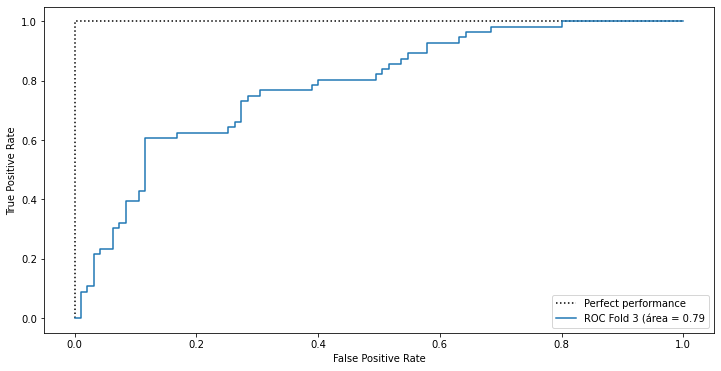

In [19]:
# ROC CURVE com SCIKIT
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay


pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2',
                        random_state=1,
                        solver='lbfgs',
                        C=100.0))

X_train2 = X_train[:, [4, 14]]

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

                                    
for i, (train, test) in enumerate(cv):
    fig, ax = plt.subplots(figsize=(12,6))
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, _ = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    roc_auc = auc(fpr, tpr)    
    plt.plot([0, 0, 1],[0, 1, 1],linestyle=':', color='black', label='Perfect performance')
    
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,estimator_name=f"ROC Fold {i+ 1} (área = {roc_auc:.2f}").plot(ax=ax)
    plt.show()

<h4>Métricas de pontuação para classificação multiclasse</h4>

<p align='justify'>As métricas de pontuação que discutimos até agora são específicas para <b>sistemas de classificação binária</b>. No entanto, o <i>scikit-learn</i> também implementa métodos de média macro e micro para estender essas métricas de pontuação para <u>problemas multiclasse</u> por meio da classificação <i>one-versus-all</i> (Um contra todos)(OvA). A micromédia é calculada a partir dos TPs, TNs, FPs e FNs individuais do sistema. Por exemplo, a micromédia da pontuação de precisão em um sistema de classe <i>k</i> pode ser calculada da seguinte forma:</p>

<p align='center'><img src=https://miro.medium.com/max/1400/1*A8-O-bAXAAXPJCri66aMCg.png width=500></p>

<p align='justify'>A micro-média é útil se quisermos ponderar cada instância ou previsão igualmente, enquanto a macro-média pondera todas as classes igualmente para avaliar o desempenho geral de um classificador em relação aos rótulos de classe mais frequentes. Se estivermos usando métricas de <b>desempenho binário</b> para avaliar modelos de <u>classificação multiclasse</u> no <i>scikit-learn</i>, uma variante normalizada ou ponderada da média macro será usada por padrão.</p>
<p align='justify'>A média macro ponderada é calculada ponderando a pontuação de cada rótulo de classe pelo número de instâncias verdadeiras ao calcular a média. A macromédia ponderada é útil se estivermos lidando com <u>desequilíbrios de classe</u>, ou seja, diferentes números de instâncias para cada rótulo. Embora a média macro ponderada seja o padrão para problemas multiclasse no <i>scikit-learn</i>, podemos especificar o método de média por meio do parâmetro <i>average</i> dentro das diferentes funções de pontuação que importamos do módulo <i>sklearn.metrics</i>, por exemplo, as funções <i>precision_score</i> ou <i>make_scorer</i>:</p>

In [20]:
# Cria um marcador de uma métrica de desempenho ou função de perda.
make_scorer(score_func=precision_score,
            pos_label=1,
            # Se score_func é uma função de pontuação (padrão), o que significa que alto é bom ou uma função de perda, o que significa que baixo é bom. 
            # No último caso, o objeto scorer irá inverter o resultado do score_func.
            greater_is_better=True, 
            average='micro')

make_scorer(precision_score, pos_label=1, average=micro)

<h4>Lidando com o desequilíbrio de classe</h4>

<p align='justify'>Ainda não discutimos como lidar adequadamente com esses cenários de desequilíbrio de classes, caso eles ocorram. O desequilíbrio de classe é um problema bastante comum quando lidamos com dados do mundo real – exemplos de uma classe ou várias classes são super-representados em um conjunto de dados.
Podemos pensar em vários domínios onde isso pode ocorrer, como filtragem de <i>spam</i>, detecção de fraude ou triagem de doenças.</p>

<p align='justify'>Imagine que o conjunto de dados do <i>Breast Cancer Wisconsin</i>, com o qual trabalhamos até o momento, consistisse em 90% de pacientes saudáveis. Nesse caso, poderíamos alcançar 90% de precisão no conjunto de dados de teste apenas <u>prevendo a classe majoritária (tumor benigno)</u> para todos os exemplos, sem a ajuda de um algoritmo de aprendizado de máquina supervisionado. Assim, treinar um modelo em um conjunto de dados que atinja aproximadamente 90% de precisão de teste significaria que nosso modelo não aprendeu nada de útil com os recursos fornecidos nesse conjunto de dados.</p>

<p align='justify'>Agora, examinaremos brevemente algumas das técnicas que podem nos ajudar com conjuntos de dados tipicamente desequilibrados. Mas antes,vamos criar um conjunto de dados desequilibrado do nosso conjunto de dados, que originalmente consistia em 357 tumores benignos (classe 0) e 212 tumores malignos (classe 1):</p>

In [21]:
# Desequilibrando as classes
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

<p align='justify'>Neste trecho de código, pegamos todos os 357 exemplos de tumores benignos e os empilhamos com os primeiros 40 exemplos malignos para criar um grande desequilíbrio de classe. Se fôssemos calcular a precisão de um modelo que sempre prevê a classe majoritária (benigno, classe 0), obteríamos uma precisão de previsão de aproximadamente 90%:</p>

In [27]:
y_pred = np.zeros(y_imb.shape[0])

print(f"O Valor da Previsão é de {np.mean(y_pred == y_imb):.2%}") 

O Valor da Previsão é de 89.92%


<p align='justify'>Assim, quando ajustamos os classificadores em tais conjuntos de dados, faria mais sentido focar em outras métricas que na  precisão quando comparando modelos diferentes, tais como <i>precision</i>, <i>recall</i>, <i>curva ROC</i> – o que mais nos importa para nossa nossa aplicação. Por exemplo, nossa prioridade pode ser identificar a maioria dos pacientes com câncer maligno para recomendar uma triagem adicional, então o <i>recall</i> deve ser nossa métrica de escolha.</p>

<p align='justify'>Na filtragem de <i>spam</i>, onde não queremos rotular e-mails como <i>spam</i> se o sistema não tiver certeza, a <i>precision</i> pode ser uma métrica mais apropriada. Além de avaliar modelos de aprendizado de máquina, o desequilíbrio de classe influencia no algoritmo de aprendizado durante o próprio ajuste do modelo. Como os algoritmos de aprendizado de máquina normalmente otimizam uma função de recompensa ou custo que é calculada como uma soma sobre os exemplos de treinamento que ele vê durante o ajuste, a regra de decisão provavelmente será <u>tendenciosa</u> para a classe majoritária.</p>

<p align='justify'>Em outras palavras, o algoritmo aprende implicitamente um modelo que otimiza as previsões com base na classe mais abundante no conjunto de dados, a fim de minimizar o custo ou maximizar a recompensa durante o treinamento. Uma maneira de lidar com proporções de classe desequilibradas durante o ajuste do modelo é <u>atribuir uma penalidade maior a previsões erradas</u> na classe minoritária. Através do <i>scikit-learn</i>, ajustar tal penalidade é tão conveniente quanto configurar o parâmetro <i>class_weight</i> para <i>class_weight='balanced'</i>, que é implementado para a maioria dos classificadores. Outras estratégias populares para lidar com o desequilíbrio de classes incluem <u>aumentar a amostra da classe minoritária, diminuir a amostra da classe majoritária e a geração de exemplos sintéticos de treinamento</u>.</p>

<p align='justify'>Infelizmente, não existe uma solução ou técnica universalmente melhor que funcione melhor em diferentes domínios de problemas. Assim, na prática, recomenda-se experimentar diferentes estratégias sobre um determinado problema, avaliar os resultados e escolher a técnica que parece mais adequada. A biblioteca <i>scikit-learn</i> implementa uma função de reamostragem simples que pode ajudar com o <i>upsampling</i> da classe minoritária, extraindo novas amostras do conjunto de dados com substituição. O código a seguir pegará a classe minoritária de nosso conjunto de dados desequilibrado <i>Breast Cancer Wisconsin</i> (aqui, classe 1) e extrairá repetidamente novas amostras até que contenha o mesmo número de exemplos que o rótulo de classe 0:</p>

In [28]:
from sklearn.utils import resample

print('Número de exemplos de classe 1 antes:', X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                    y_imb[y_imb == 1],
                                    replace=True,
                                    n_samples=X_imb[y_imb == 0].shape[0],
                                    random_state=123)

print('Número de exemplos de classe 1 depois', X_upsampled.shape[0])

Número de exemplos de classe 1 antes: 40
Número de exemplos de classe 1 depois 357


In [31]:
# Após a reamostragem, podemos empilhar as amostras originais de classe 0 com o subconjunto de classe 1 upsampled para obter
# um conjunto de dados balanceado da seguinte maneira:

X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

# Consequentemente, uma regra de previsão de voto majoritário atingiria apenas 50% de precisão:

y_pred = np.zeros(y_bal.shape[0])
print(f"O Valor da Previsão é de {np.mean(y_pred == y_bal):.2%}") 


O Valor da Previsão é de 50.00%


<p align='justify'>Da mesma forma, podemos reduzir a amostra da classe majoritária removendo exemplos de treinamento do conjunto de dados. Para realizar o <i>downsampling</i> usando a função <i>resample</i>, podemos simplesmente trocar o rótulo da classe 1 pela classe 0 no exemplo de código anterior e vice-versa.</p>